In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [9]:
X, y=make_circles(n_samples=100, noise=0.1, random_state=1)

In [10]:
X_train, X_test, y_train, y_test=train_test_split(X, y, stratify=y, random_state=1)

In [11]:
model=Sequential()
model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
from math import fabs
callback=EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=False,
    min_delta=0.0001,
    verbose=1,
    mode='auto',
    baseline=None
)

In [29]:
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, callbacks=[callback])

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9159 - loss: 0.2503 - val_accuracy: 0.8000 - val_loss: 0.4634
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9276 - loss: 0.2358 - val_accuracy: 0.8000 - val_loss: 0.4620
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9393 - loss: 0.2174 - val_accuracy: 0.8000 - val_loss: 0.4615
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9248 - loss: 0.2211 - val_accuracy: 0.8000 - val_loss: 0.4642
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9092 - loss: 0.2265 - val_accuracy: 0.7600 - val_loss: 0.4658
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9209 - loss: 0.2377 - val_accuracy: 0.7600 - val_loss: 0.4691
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9170 - loss: 0.2380 - val_accuracy: 0.7600 - val_loss: 0.4701
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9366 - loss: 0.2083 - val_accuracy: 0.7600 - v

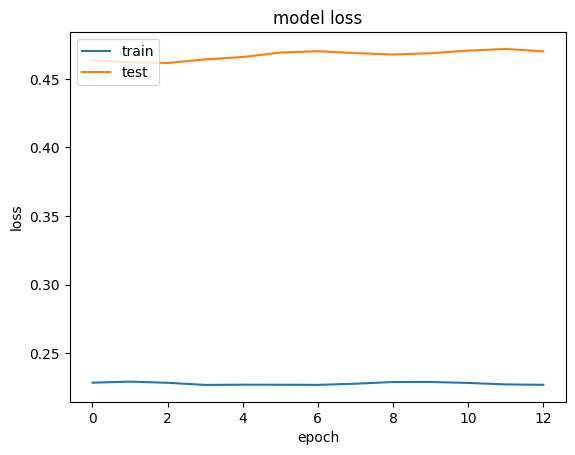

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()